# NOMA Down Link

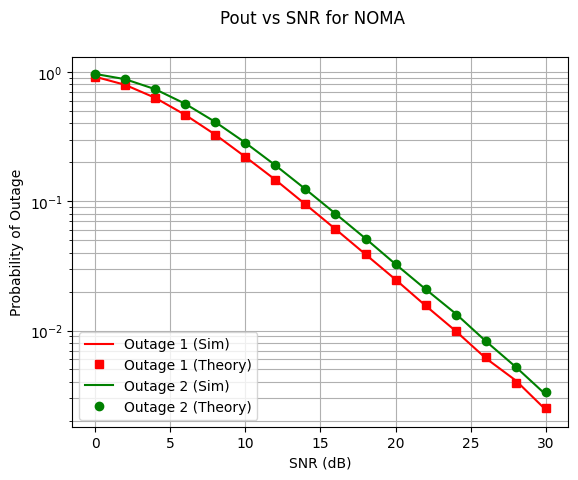

In [4]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

beta1=1; beta2=1;
# beta3 = 2;
SNRdB=np.arange(0,31,2); SNR=10**(SNRdB/10);
a1=0.7; a2=1-a1;

blklen=1000000;
tildeR_1=1; tildeR_2=1; tildeR_3 = 1;
R1=2**tildeR_1-1;
R2=2**tildeR_2-1;
phi=max(R2/a2,R1/(a1-a2*R1));

Pout1 = np.zeros(len(SNRdB));
Pout2 = np.zeros(len(SNRdB));
Pout1_theory = np.zeros(len(SNRdB));
Pout2_theory = np.zeros(len(SNRdB));

for ix in range(len(SNRdB)):
  rhos = SNR[ix]
  h1 = np.sqrt(beta1/2)*(nr.normal(0,1,blklen)+1j*nr.normal(0,1,blklen))
  h2 = np.sqrt(beta2/2)*(nr.normal(0,1,blklen)+1j*nr.normal(0,1,blklen))
  b_1 = np.absolute(h1)**2
  b_2 = np.absolute(h2)**2
  gamma1_u1 = (a1*rhos*b_1)/(a2*rhos*b_1+1)
  gamma1_u2 = (a1*rhos*b_2)/(a2*rhos*b_2+1)
  gamma2_u2 = (a2*rhos*b_2)
  Pout1[ix] = np.sum(np.log2(1+gamma1_u1)<tildeR_1)/blklen
  Pout2[ix] = np.sum(np.logical_or(np.log2(1+gamma1_u2)<tildeR_1,np.log2(1+gamma2_u2)<tildeR_2))/blklen
  Pout1_theory[ix] = 1-np.exp(-R1/(beta1*rhos*(a1-a2*R1)))
  Pout2_theory[ix] = 1-np.exp(-phi/(rhos*beta2))


plt.yscale('log')
plt.plot(SNRdB, Pout1,'r-');
plt.plot(SNRdB, Pout1_theory,'rs');
plt.plot(SNRdB, Pout2,'g-');
plt.plot(SNRdB, Pout2_theory,'go');
plt.grid(1,which='both')
plt.legend(["Outage 1 (Sim)", "Outage 1 (Theory)","Outage 2 (Sim)", "Outage 2 (Theory)"], loc ="lower left");
plt.suptitle('Pout vs SNR for NOMA')
plt.ylabel('Probability of Outage')
plt.xlabel('SNR (dB)')
plt.show()


# NOMA Up Link

Text(0.5, 0, 'SNR (dB)')

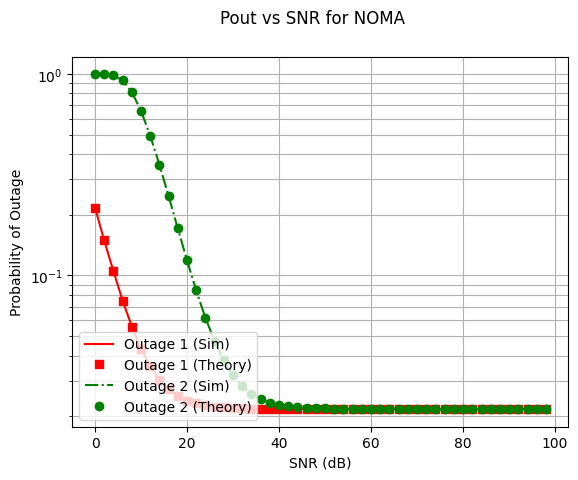

In [ ]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

beta1=5; beta2=1
SNRdB=np.arange(0,100,2)
SNR=10**(SNRdB/10)
a1=0.9
a2=1-a1

blklen=1000000
tildeR_1=1; tildeR_2=1
R1=2**tildeR_1-1
R2=2**tildeR_2-1
phi2 = (R1/(a1*beta1))+(R2/(a2*beta2))+((R1*R2)/(a1*beta1))
phi3 = 1+((R1*a2*beta2)/(a1*beta1))

Pout1 = np.zeros(len(SNRdB));
Pout2 = np.zeros(len(SNRdB));
Pout1_theory = np.zeros(len(SNRdB));
Pout2_theory = np.zeros(len(SNRdB));

for ix in range(len(SNRdB)):
  rhos = SNR[ix]
  h1 = np.sqrt(beta1/2)*(nr.normal(0,1,blklen)+1j*nr.normal(0,1,blklen))
  h2 = np.sqrt(beta2/2)*(nr.normal(0,1,blklen)+1j*nr.normal(0,1,blklen))
  b_1 = np.absolute(h1)**2
  b_2 = np.absolute(h2)**2
  gamma1 = (a1*rhos*b_1)/(a2*rhos*b_2+1)
  gamma2 = a2*rhos*b_2
  Pout1[ix] = np.sum(np.log2(1+gamma1)<tildeR_1)/blklen
  Pout2[ix] = np.sum(np.logical_or(np.log2(1+gamma1)<tildeR_1,np.log2(1+gamma2)<tildeR_2))/blklen

  Pout1_theory[ix] = 1-((np.exp(-R1/(a1*rhos*beta1)))/(1+((R1*a2*beta2)/(a1*beta1))))
  Pout2_theory[ix] = 1-((np.exp(-phi2/rhos))/(phi3))


plt.yscale('log')
plt.plot(SNRdB, Pout1,'r-');
plt.plot(SNRdB, Pout1_theory,'rs');
plt.plot(SNRdB, Pout2,'g-.');
plt.plot(SNRdB, Pout2_theory,'go');
plt.grid(1,which='both')
plt.legend(["Outage 1 (Sim)", "Outage 1 (Theory)","Outage 2 (Sim)", "Outage 2 (Theory)"], loc ="lower left");
plt.suptitle('Pout vs SNR for NOMA')
plt.ylabel('Probability of Outage')
plt.xlabel('SNR (dB)')

